## Import modules

### Import files

In [ ]:
from server import *
from prompt_template.prompt_rephrase import *
from global_functions import *

### Import games

In [ ]:
from games.guessing_game import *
from games.bar_game import *
from games.pirate_game import *
from games.diner_dilemma import *
from games.divide_dollar import *
from games.sealed_bid_auction import *
from games.public_goods import *
from games.battle_royale import *

### Import board

In [2]:
from board import *
board = Leaderboard()
board.show()

## Operations

### Rephrase prompt templates

In [ ]:
game_file = 'bar_game'
rephrase_files = ['description', 'report_explicit', 'report_implicit', 'request']
rephrase([f"prompt_template/{game_file}/{f}_v1.txt" for f in rephrase_files], replace_suffix="v1", suffix="v2")

## Game Run

### Model Configuration

In [ ]:
# Set all players to be gpt-3.5-turbo
models = 'gpt-3.5-turbo'    

# Players in odd position are gpt-3.5-turbo, even position are gpt-4
player_num = 10
models = ['gpt-3.5-turbo' if i%2==0 else 'gpt-4' for i in range(player_num)]

### Game Run (Guessing Game)

In [ ]:
# Initialize guessing game with parameters
game = GuessingGame(player_num=10, min=0, max=100, ratio=2/3, ratio_str='2/3', version='v1')

# Run for 20 rounds
game.run(20)

### Game Load (Guessing Game)

In [ ]:
game = load('save/guessing_game.json', GuessingGame)  # load the saved data 
game = load('save/guessing_game.json', GuessingGame, 'guessing_game2')  # load and save as new file

# Run for 20 more rounds
game.run(20)

### Game Show

In [ ]:
# Show the analysis results with specifying players
game.show('model', ['gpt-3.5-turbo'])
game.show('id', [f"player_{i}" for i in range(player_num) if i%2==0])

## Analysis 
- only available for `GuessingGame`, `BarGame`, `DivideDollar`, `DinerDilemma`

### Import files

In [1]:
from server import *
from global_functions import *
from analysis.analysis import *

### Import games

In [2]:
from games.guessing_game import *
from games.bar_game import *
from games.diner_dilemma import *
from games.divide_dollar import *

### Plot

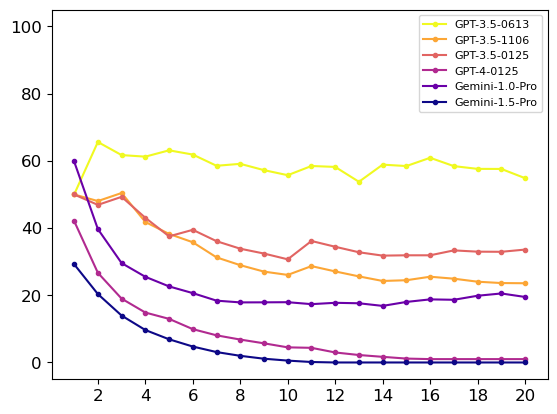

In [3]:
# Create a game plane
plane = Analysis(GuessingGame)

# Load the files with the same label
files = [f'raw_results/guessing_game/gpt-3.5-turbo-0613_guessing_game_v1_{i}.json' for i in range(1,6)]
plane.add_avg(files, "GPT-3.5-0613")

files = [f'raw_results/guessing_game/gpt-3.5-turbo-1106_guessing_game_v1_{i}.json' for i in range(1,6)]
plane.add_avg(files, "GPT-3.5-1106")

files = [f'raw_results/guessing_game/guessing_game_v1_{i}.json' for i in range(1,6)]
plane.add_avg(files, "GPT-3.5-0125")

files = [f'raw_results/guessing_game/gpt-4-0125-preview_guessing_game_v1_{i}.json' for i in range(1,6)]
plane.add_avg(files, "GPT-4-0125")

files = [f'raw_results/guessing_game/gemini-1.0-pro_guessing_game_v1_{i}.json' for i in range(1,6)]
plane.add_avg(files, "Gemini-1.0-Pro")

files = [f'raw_results/guessing_game/gemini-1.5-pro_guessing_game_v1_{i}.json' for i in range(1,6)]
plane.add_avg(files, "Gemini-1.5-Pro")

# Plot the game
plane.plot(xlabel="", ylim=(-5, 105), savename="closed-source_guessing_game")